In [22]:
from astropy.table import Table
import pdb
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord

import matplotlib
%matplotlib inline

In [2]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 
                            'mathtext.fontset': 'stix'})

In [16]:
clumpy = Table.read('../data/clumpy_coadd_dr12_mass_spectra.fits')
clumpy2 = Table.read('../data/clumpy_coadd_final75_gzh_dr12ancillary.fits')

In [119]:
GSWLC = Table.read("../data/GSWLC-X1.dat", format='ascii.fast_no_header')

In [121]:
# why the FUCK don't they put the damn column headers in themselves?!! How obnoxious.
colnames = ['DR12_OBJID', 'GLXID', 'plate', 'MJD', 'fiber ID', 'RA', 'DEC', 'z', 'chi_sq', 
           'M*', 'M*_err', 'SFR', 'SFR_err', 'A_FUV', 'A_FUV_err', 'A_B', 'A_B_err', 'A_V',
           'A_V_err', 'flag_sed', 'UV_survey', 'SFR_wise', 'flag_wise', 'SFR_unwise',
           'flag_unwise', 'flag_mgs']

for i, name in enumerate(colnames):
    GSWLC.rename_column('col{}'.format(i+1), name)

In [165]:
#clumpy2.colnames

In [127]:
catalog = SkyCoord(ra=GSWLC['RA']*u.deg, dec=GSWLC['DEC']*u.deg)
sample = SkyCoord(ra=clumpy2['DR12_RA']*u.deg, dec=clumpy2['DR12_DEC']*u.deg)
idx, d2d, d3d = sample.match_to_catalog_sky(catalog)

In [128]:
from astropy.coordinates import Angle
print Angle(d2d, u.arcsec)[close_mask]

[u'0.197704arcsec' u'0.123435arcsec' u'1.39532arcsec' u'0.205284arcsec'
 u'0.140809arcsec' u'0.133922arcsec' u'0.0565079arcsec' u'0.18016arcsec'
 u'0.0846442arcsec' u'4.50877arcsec' u'0.051981arcsec' u'5.0384arcsec'
 u'0.223543arcsec' u'0.107302arcsec' u'0.175993arcsec' u'0.345666arcsec'
 u'0.1476arcsec' u'0.450691arcsec' u'4.18483arcsec' u'0.260011arcsec'
 u'0.0274145arcsec' u'0.329988arcsec' u'0.21604arcsec' u'0.0938457arcsec'
 u'0.0335853arcsec' u'0.127261arcsec' u'0.484988arcsec' u'0.166769arcsec'
 u'0.172837arcsec' u'0.257097arcsec' u'0.144146arcsec' u'0.399588arcsec'
 u'0.218779arcsec' u'0.474903arcsec' u'3.71435arcsec' u'0.0254519arcsec'
 u'0.108859arcsec' u'0.084887arcsec' u'8.92643arcsec' u'0.0766391arcsec'
 u'1.49449arcsec' u'0.111453arcsec' u'5.54636arcsec' u'0.225476arcsec'
 u'0.401961arcsec' u'0.0563168arcsec' u'13.9507arcsec' u'0.24902arcsec'
 u'0.061351arcsec' u'0.0982607arcsec' u'0.135838arcsec' u'0.179322arcsec'
 u'0.074443arcsec' u'0.432684arcsec' u'2.70141arcsec' u'0

In [132]:
close_mask = (catalog[idx].separation(sample)<20*u.arcsec)
close_matches_in_clumpy = clumpy2[close_mask]
close_matches_in_GSWLC = GSWLC[idx[close_mask]]

#for id1, id2, sep in zip(close_matches_in_GSWLC['DR12_OBJID'], close_matches_in_clumpy['DR12_OBJID'], 
#                         Angle(d2d[close_mask], u.arcsec)):
#    print id1, id2, sep

In [133]:
print len(close_matches_in_clumpy)
print np.sum(close_matches_in_clumpy['AVG_Z']<=0.04)

64
38


### I've come to realize that the DR12 OBJID I have for the clumpy galaxies are not good.
When you enter them into SDSS Navigator the correct subject comes up but it's missing 
the link to the interactive spectra section and additional information. I wonder if I didn't get the Primary Object ID or something.... 
### Anyway. I am going overwrite them with those that I found in this GSWL catalog

In [97]:
clumpy2['DR12_OBJID'][close_mask] = GSWLC['DR12_OBJID'][idx[close_mask]]

In [134]:
len(set(clumpy2['DR12_OBJID']) & set(GSWLC['DR12_OBJID']))

64

In [135]:
lowz = close_matches_in_clumpy[close_matches_in_clumpy['AVG_Z']<=0.04]
lowz_GSWLC = close_matches_in_GSWLC[close_matches_in_GSWLC['z']<=0.04]

### Half the lowz sample doesn't have 22 um detection in WISE (flag_unwise = 5)

(array([ 18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

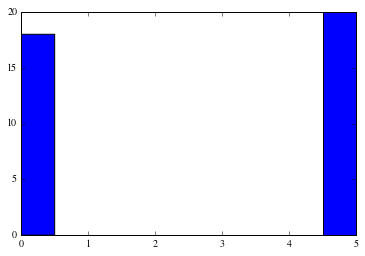

In [136]:
plt.hist(lowz_GSWLC['flag_unwise'])

### ~ 3 have SED fitting with chi square > 30 

(array([ 34.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

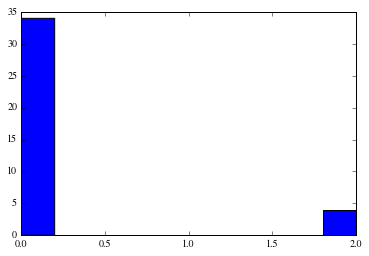

In [137]:
plt.hist(lowz_GSWLC['flag_sed'])

### Most subjects have medium-depth UV imaging, a few have only shallowest; a few have the deepest depth

(array([  3.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,   6.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

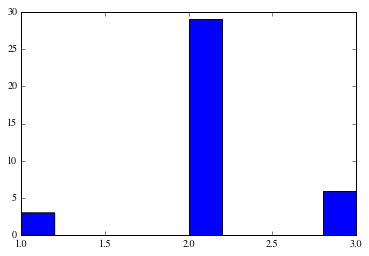

In [139]:
plt.hist(lowz_GSWLC['UV_survey'])

## SFR vs Stellar Mass for 34 clumpy gals with z < 0.04

34


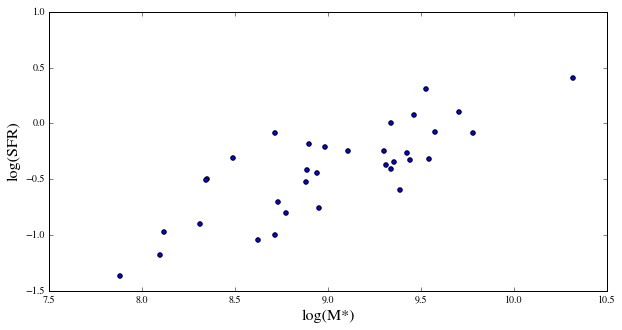

In [164]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(111)

ax.scatter(lowz_GSWLC['M*'][lowz_GSWLC['flag_sed']==0],
           lowz_GSWLC['SFR'][lowz_GSWLC['flag_sed']==0])
ax.set_xlabel('log(M*)', fontsize=16)
ax.set_ylabel('log(SFR)', fontsize=16)

print len(lowz_GSWLC['M*'][lowz_GSWLC['flag_sed']==0])


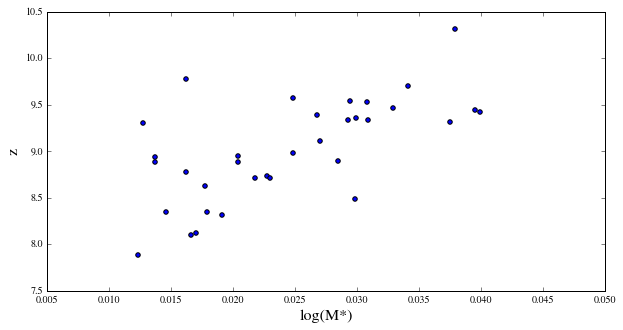

In [167]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(111)

ax.scatter(lowz_GSWLC['z'][lowz_GSWLC['flag_sed']==0],
           lowz_GSWLC['M*'][lowz_GSWLC['flag_sed']==0])
ax.set_xlabel('log(M*)', fontsize=16)
ax.set_ylabel('z', fontsize=16)